In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
data = pd.read_csv("../Datasets/matches.csv")

In [6]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
data.shape

(636, 18)

In [8]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [10]:
data.result.value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [11]:
data = data.drop("umpire3",axis=1)

In [12]:
matches_per_season = data.groupby('season').id.count()

In [13]:
matches_per_season

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
Name: id, dtype: int64

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0.5, 0, 'Seasons'), Text(0, 0.5, 'No. of Matches')]

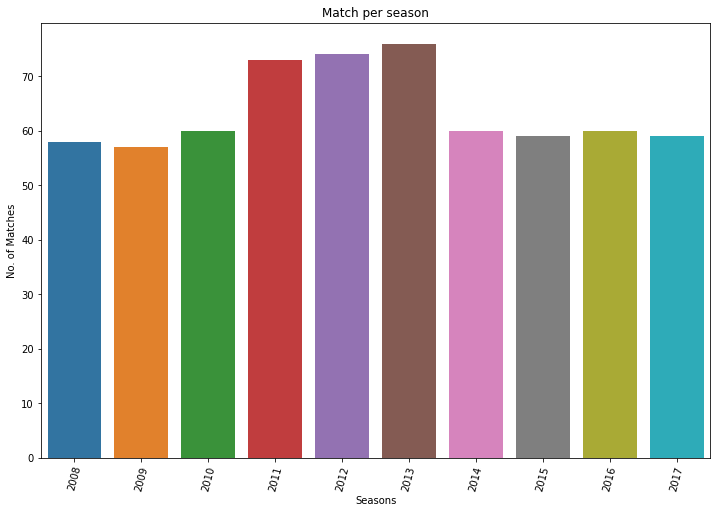

In [15]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.title("Match per season")
matches_per_season_plot = sns.barplot(x=matches_per_season.index, y=matches_per_season)
matches_per_season_plot.set(xlabel="Seasons", ylabel="No. of Matches")

### Analyzing the Toss results

In [16]:
toss_decision_percentage = data.groupby("season").toss_decision.value_counts().sort_index()

In [17]:
toss_decision_percentage

season  toss_decision
2008    bat              26
        field            32
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    bat              25
        field            48
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    bat              19
        field            41
2015    bat              25
        field            34
2016    bat              11
        field            49
2017    bat              11
        field            48
Name: toss_decision, dtype: int64

In [18]:
toss_decision_percentage.unstack()

toss_decision,bat,field
season,,
2008,26,32
2009,35,22
2010,39,21
2011,25,48
2012,37,37
2013,45,31
2014,19,41
2015,25,34
2016,11,49


<AxesSubplot:title={'center':'Toss Decision'}, xlabel='Seasons', ylabel='Percentage'>

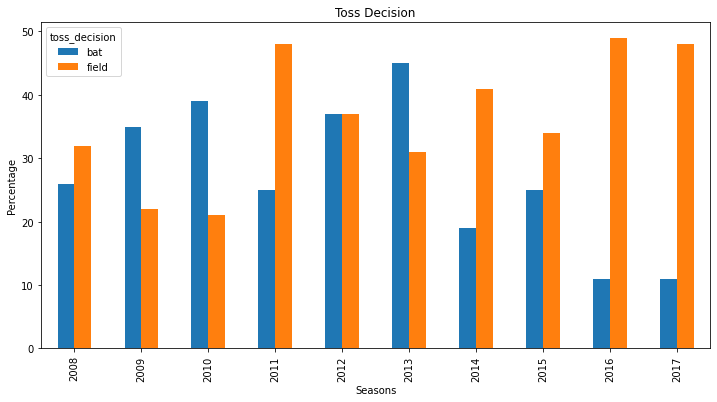

In [19]:
toss_decision_percentage.unstack().plot(kind='bar', xlabel="Seasons", ylabel="Percentage" , figsize=(12,6), title="Toss Decision")

### Number of Wins

In [20]:
filter1 = ( data.win_by_wickets == 0) & ( data.result == "normal")

In [21]:
wins_batting_first = data[filter1].groupby("season").winner.count() / matches_per_season * 100

In [22]:
filter2 = (data.win_by_runs == 0) & (data.result == 'normal')

In [23]:
wins_fielding_first = data[filter2].groupby('season').winner.count() / matches_per_season * 100

In [24]:
combine_win_df = pd.concat([wins_batting_first, wins_fielding_first], axis=1)
combine_win_df.columns = ["batting_first","fielding_first"]
combine_win_df

,batting_first,fielding_first
season,,
2008,41.379310,58.620690
2009,47.368421,50.877193
2010,51.666667,46.666667
2011,45.205479,53.424658
2012,45.945946,54.054054
2013,48.684211,48.684211
2014,36.666667,61.666667
2015,54.237288,40.677966
2016,35.000000,65.000000


<AxesSubplot:title={'center':'Wins'}, xlabel='Seasons', ylabel='Percentage'>

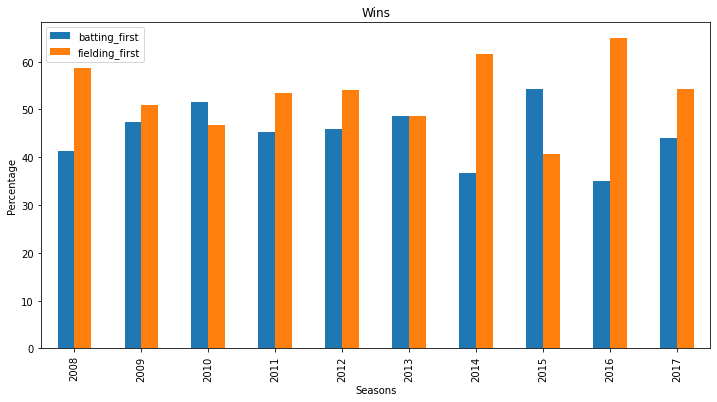

In [25]:
combine_win_df.plot(kind='bar', figsize=(12,6), xlabel="Seasons", ylabel="Percentage", title="Wins")

### Teams with "History"

In [26]:
total_matches_played = ( data.team1.value_counts() + data.team2.value_counts() ).sort_values(ascending=False)
total_matches_played

Mumbai Indians                 157
Royal Challengers Bangalore    152
Kings XI Punjab                148
Kolkata Knight Riders          148
Delhi Daredevils               147
Chennai Super Kings            131
Rajasthan Royals               118
Sunrisers Hyderabad             76
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

[Text(0.5, 0, 'No. of Matches'), Text(0, 0.5, 'Teams')]

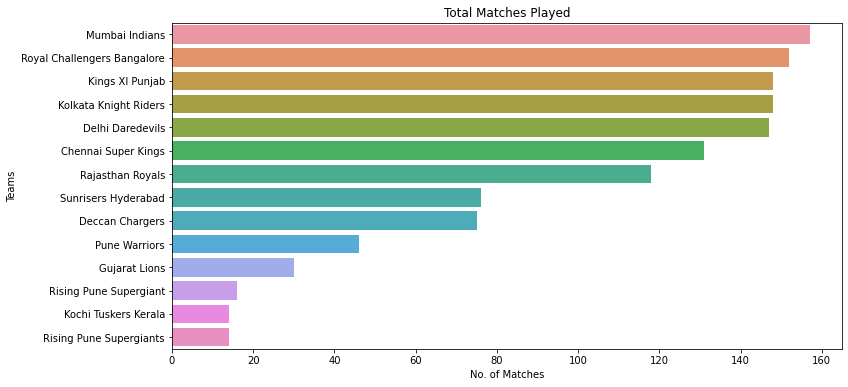

In [27]:
plt.figure(figsize=(12,6))
plt.title("Total Matches Played")
total_matches_played_plot = sns.barplot(y=total_matches_played.index, x=total_matches_played)
total_matches_played_plot.set(xlabel="No. of Matches", ylabel="Teams")

### Teams with "Legacy"

In [28]:
most_wins = data.winner.value_counts()
most_wins

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [29]:
win_percentage = ( most_wins / total_matches_played ).sort_values(ascending = False) * 100
win_percentage

Rising Pune Supergiant         62.500000
Chennai Super Kings            60.305344
Mumbai Indians                 58.598726
Sunrisers Hyderabad            55.263158
Rajasthan Royals               53.389831
Kolkata Knight Riders          52.027027
Royal Challengers Bangalore    48.026316
Kings XI Punjab                47.297297
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               42.176871
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64

[Text(0, 0.5, 'Teams'), Text(0.5, 0, 'Percentage')]

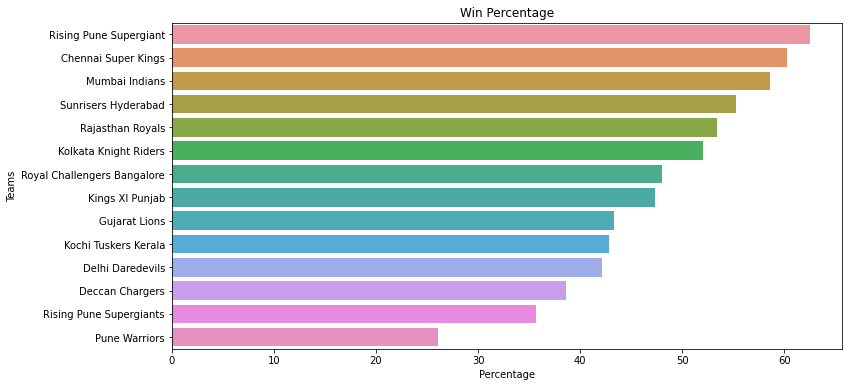

In [30]:
plt.figure(figsize=(12,6))
plt.title("Win Percentage")
win_percentage_plot = sns.barplot( y = win_percentage.index, x = win_percentage)
win_percentage_plot.set(ylabel="Teams", xlabel="Percentage")

### Q. Who has won the IPL tournament?

In [31]:
ipl_win = data.groupby("season").tail(1).sort_values('season', ascending=True)
ipl_win

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi


In [32]:
ipl_winners = ipl_win.winner.value_counts()
ipl_winners

Mumbai Indians           3
Chennai Super Kings      2
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

[Text(0.5, 0, 'Teams'), Text(0, 0.5, 'No. of Winners')]

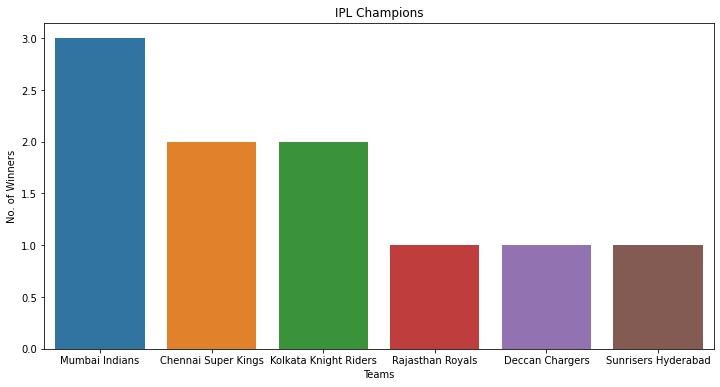

In [33]:
plt.figure(figsize=(12,6))
plt.title("IPL Champions")
ipl_winners_plot = sns.barplot(x= ipl_winners.index, y= ipl_winners)
ipl_winners_plot.set(xlabel="Teams", ylabel="No. of Winners")

### Q. Which are the most and least consistent teams across all seasons?

In [34]:
matches_won_each_season = pd.crosstab(data["winner"], data["season"])
matches_won_each_season

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
winner,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0
Deccan Chargers,2,9,8,6,4,0,0,0,0,0
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6
Gujarat Lions,0,0,0,0,0,0,0,0,9,4
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9
Mumbai Indians,7,5,11,10,10,13,7,10,7,12
Pune Warriors,0,0,0,4,4,4,0,0,0,0


<AxesSubplot:title={'center':'Matches Won Each Season'}, xlabel='season', ylabel='winner'>

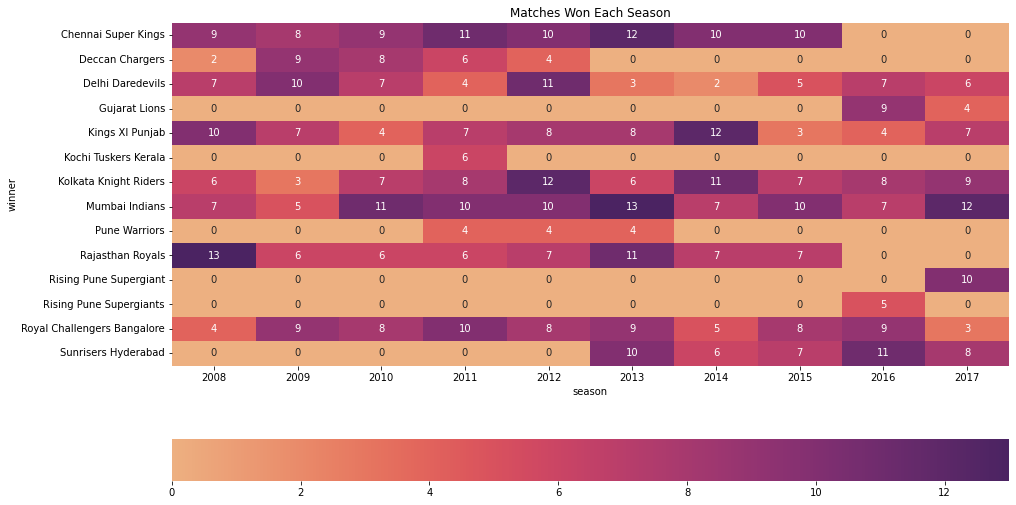

In [36]:
plt.figure(figsize=(15, 9))
plt.xlabel('Seasons')
plt.ylabel('Teams')
plt.title('Matches Won Each Season')
sns.heatmap(matches_won_each_season, annot=True, cmap='flare', fmt='d', cbar_kws={'orientation':'horizontal'})

### Q. What has been the biggest margin of victory in terms of runs in the IPL?

In [38]:
highest_wins_by_runs_df = data[data.win_by_runs != 0].sort_values('win_by_runs', ascending = False)
highest_wins_by_runs_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,2016,Delhi,2016-04-27,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi
163,164,2009,Johannesburg,2009-05-17,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,normal,0,Kings XI Punjab,1,0,Yuvraj Singh,New Wanderers Stadium,S Ravi,RB Tiffin
105,106,2008,Mumbai,2008-05-21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar
518,519,2015,Chennai,2015-04-09,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,1,0,A Nehra,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni


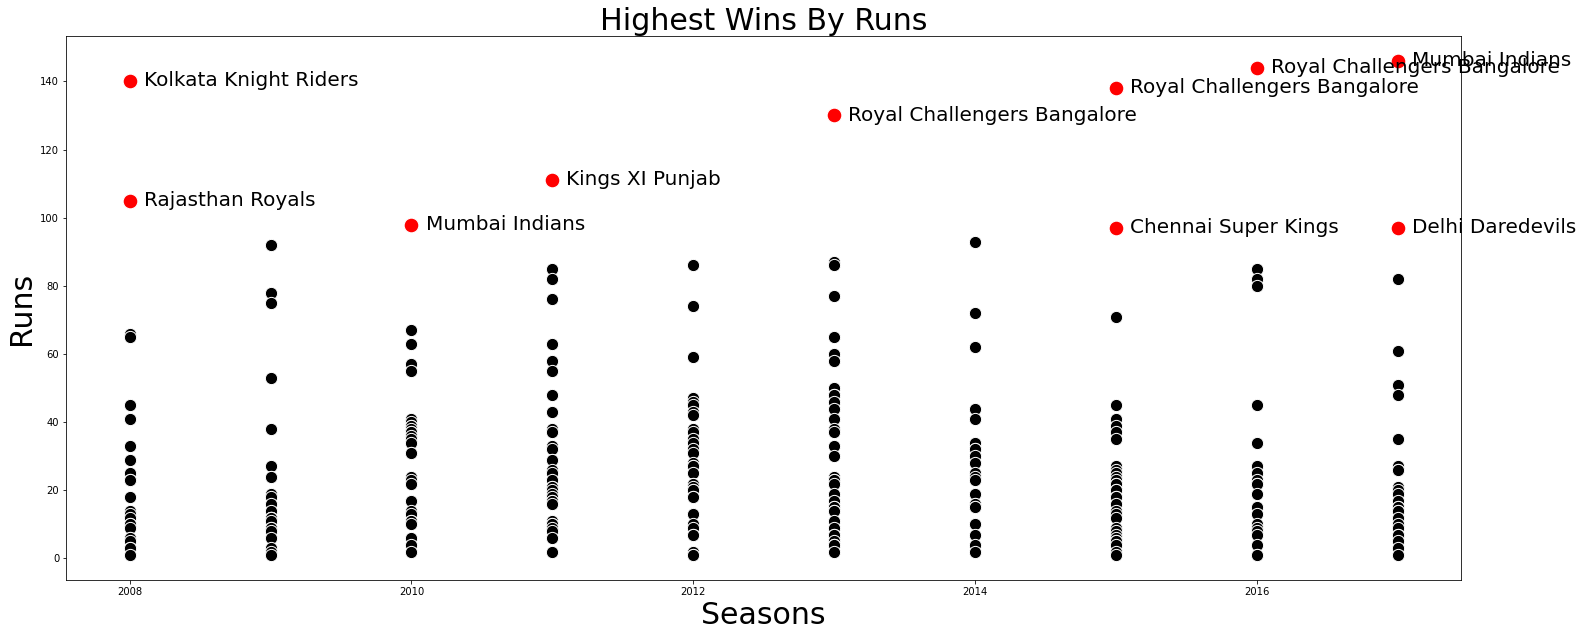

In [57]:
plt.figure(figsize=(25, 10))
plt.xlabel('Seasons',size=30)
plt.ylabel('Runs',size=30)
plt.title('Highest Wins By Runs', size = 30)
sns.scatterplot( x="season", y="win_by_runs", data=highest_wins_by_runs_df , s=150, color="black")
sns.scatterplot( x="season", y="win_by_runs", data=highest_wins_by_runs_df.head(10), s=220, color="red")
for i in range(highest_wins_by_runs_df.head(10).shape[0]):
    plt.annotate(highest_wins_by_runs_df.winner.tolist()[i], (highest_wins_by_runs_df.season.tolist()[i]+0.1, highest_wins_by_runs_df.win_by_runs.tolist()[i]-1.5) , size = 20)

### Q. Mumbai and Chennai are the two most successful teams so far. Which team leads in the head-to-head record?

In [60]:
mivcsk_df = data[((data.team1 == "Mumbai Indians") & (data.team2 == "Chennai Super Kings")) | ((data.team2 == "Mumbai Indians") & (data.team1 == "Chennai Super Kings"))].winner.value_counts()
mivcsk_df

Mumbai Indians         12
Chennai Super Kings    10
Name: winner, dtype: int64

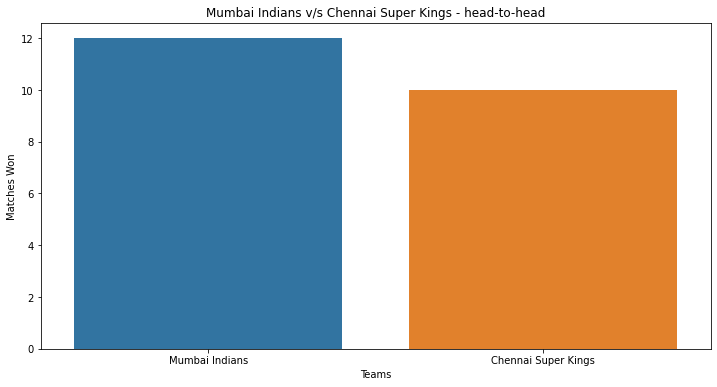

In [62]:
plt.figure(figsize=(12,6))
plt.title('Mumbai Indians v/s Chennai Super Kings - head-to-head')
mivcsk_plot = sns.barplot(x = mivcsk_df.index, y = mivcsk_df);
mivcsk_plot.set(xlabel = 'Teams', ylabel = 'Matches Won');